# **Cargar dataset y librerias**

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nibabel as nib
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [26]:
sns.set_theme(style="whitegrid")

In [15]:
metadata_attributes_df = pd.read_excel('../datos/otros_labels/Metadata_Attributes.xlsx')
train_label_summary_df = pd.read_excel('../datos/otros_labels/train_label_summary.xlsx')
train_metadata_df = pd.read_csv('../datos/otros_labels/train_metadata.csv')
train_reports_df = pd.read_csv('../datos/otros_labels/train_reports.csv')


In [16]:
metadata_attributes_df.head()

,Attribute,Explanation
0,VolumeName,The file name.
1,Manufacturer,Manufacturer of the equipment that produced th...
2,SeriesDescription,Description of the Series.
3,ManufacturerModelName,Manufacturer's model name of the equipment tha...
4,PatientSex,Sex of the named Patient.


In [17]:
train_label_summary_df.head()

,Patient ID,Spleen,Kidney R,Kidney L,Gallbladder,Liver,Stomach,Aorta,Inferior vena cava,Portal vein and splenic vein,...,Subcutaneous tissue,Muscle,Abdominal cavity,Thoracic cavity,Bones,Gland structure,Pericardium,Prosthetic breast implant,Mediastinum,Spinal cord
0,train_10000_a_2,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,...,True,True,1.0,1.0,True,1.0,1.0,NaN,1.0,1.0
1,train_10001_a_2,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,True,True,1.0,1.0,True,1.0,1.0,NaN,1.0,1.0
2,train_10002_a_2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,True,True,1.0,1.0,True,1.0,1.0,1.0,1.0,1.0
3,train_10003_a_2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,True,True,1.0,1.0,True,1.0,1.0,1.0,1.0,1.0
4,train_10004_a_2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,True,True,1.0,1.0,True,1.0,1.0,NaN,1.0,1.0


In [18]:
train_metadata_df.head()

,VolumeName,Manufacturer,SeriesDescription,ManufacturerModelName,PatientSex,PatientAge,ReconstructionDiameter,DistanceSourceToDetector,DistanceSourceToPatient,GantryDetectorTilt,...,PhotometricInterpretation,Rows,Columns,XYSpacing,RescaleIntercept,RescaleSlope,RescaleType,NumberofSlices,ZSpacing,StudyDate
0,train_1_a_1.nii.gz,Siemens Healthineers,"Thorax 1,50 Br40 S3",SOMATOM go.All,NaN,049Y,420.303754,983.0,535.0,0,...,MONOCHROME2,512,512,"[0.82090625, 0.82090625]",-8192,1,HU,303,1.00,20220110
1,train_1_a_2.nii.gz,Siemens Healthineers,"Thorax 1,50 Br60 S3",SOMATOM go.All,NaN,049Y,420.303754,983.0,535.0,0,...,MONOCHROME2,512,512,"[0.82090625, 0.82090625]",-8192,1,HU,303,1.00,20220110
2,train_2_a_1.nii.gz,Siemens Healthineers,"Thorax 1,50 Br40 S3",SOMATOM go.All,M,045Y,365.000000,983.0,535.0,0,...,MONOCHROME2,512,512,"[0.712890625, 0.712890625]",-8192,1,HU,306,1.00,20211116
3,train_2_a_2.nii.gz,Siemens Healthineers,"Thorax 1,50 Br60 S3",SOMATOM go.All,M,045Y,365.000000,983.0,535.0,0,...,MONOCHROME2,512,512,"[0.712890625, 0.712890625]",-8192,1,HU,306,1.00,20211116
4,train_3_a_1.nii.gz,Siemens Healthineers,"Thorax 1,50 Bl56 S3",SOMATOM go.All,M,073Y,389.651856,983.0,535.0,0,...,MONOCHROME2,512,512,"[0.7610390625, 0.7610390625]",-8192,1,HU,270,1.25,20220608


In [19]:
train_reports_df.head()

,VolumeName,ClinicalInformation_EN,Technique_EN,Findings_EN,Impressions_EN
0,train_1_a_1.nii.gz,Not given.,Non-contrast images were taken in the axial pl...,Multiple venous collaterals are present in the...,Multiple venous collaterals in the anterior l...
1,train_1_a_2.nii.gz,Not given.,Non-contrast images were taken in the axial pl...,Multiple venous collaterals are present in the...,Multiple venous collaterals in the anterior l...
2,train_2_a_1.nii.gz,Not given.,Non-contrast images were taken in the axial pl...,Trachea and both main bronchi were in the midl...,Emphysematous and passive atelectatic changes...
3,train_2_a_2.nii.gz,Not given.,Non-contrast images were taken in the axial pl...,Trachea and both main bronchi were in the midl...,Emphysematous and passive atelectatic changes...
4,train_3_a_1.nii.gz,Kidney transplant candidate.,Non-contrast images were taken in the axial pl...,Right thyroid lobe sizes increased. Evaluation...,Calcific atheromatous plaques in coronary art...


# **Limpieza de datos**

In [20]:
# Limpieza train_metadata_df
if "PatientAge" in train_metadata_df.columns:
    train_metadata_df["PatientAge"] = train_metadata_df["PatientAge"].astype(str).str.replace("Y", "")
    train_metadata_df["PatientAge"] = pd.to_numeric(train_metadata_df["PatientAge"], errors="coerce")
    train_metadata_df.loc[(train_metadata_df["PatientAge"] < 0) | (train_metadata_df["PatientAge"] > 120), "PatientAge"] = np.nan

if "PatientSex" in train_metadata_df.columns:
    train_metadata_df["PatientSex"] = train_metadata_df["PatientSex"].fillna("Unknown")

num_cols = ["ReconstructionDiameter", "DistanceSourceToDetector", "DistanceSourceToPatient"]
for col in num_cols:
    if col in train_metadata_df.columns:
        train_metadata_df[col] = pd.to_numeric(train_metadata_df[col], errors="coerce")

if "VolumeName" in train_metadata_df.columns:
    train_metadata_df = train_metadata_df.drop_duplicates(subset="VolumeName")

# Limpieza train_reports_df
clinical_cols = ["ClinicalInformation_EN", "Technique_EN", "Findings_EN", "Impressions_EN"]
for col in clinical_cols:
    if col in train_reports_df.columns:
        train_reports_df[col] = train_reports_df[col].replace("Not given.", pd.NA)

if "VolumeName" in train_reports_df.columns:
    train_reports_df = train_reports_df.drop_duplicates(subset="VolumeName")

# Limpieza train_label_summary_df
if "VolumeName" in train_label_summary_df.columns:
    train_label_summary_df = train_label_summary_df.drop_duplicates(subset="VolumeName")

In [21]:
# Limpieza de PatientAge
if "PatientAge" in train_metadata_df.columns and train_metadata_df["PatientAge"].isna().all():
    raw_age = pd.read_csv("../datos/otros_labels/train_metadata.csv", usecols=["VolumeName","PatientAge"])
    raw_age["VolumeName"] = raw_age["VolumeName"].astype(str).str.strip()
    train_metadata_df["VolumeName"] = train_metadata_df["VolumeName"].astype(str).str.strip()
    train_metadata_df = (
        train_metadata_df.drop(columns=["PatientAge"], errors="ignore")
        .merge(raw_age, on="VolumeName", how="left")
    )

# 1) Extraer numeros desde el texto (ej. "049Y" -> "049")
train_metadata_df["PatientAge"] = (
    train_metadata_df["PatientAge"]
    .astype("string")         
    .str.strip()
    .str.extract(r"(\d{1,3})", expand=False) 
)

# 2) Convertira entero
train_metadata_df["PatientAge"] = pd.to_numeric(
    train_metadata_df["PatientAge"], errors="coerce"
).astype("Int64")


print("Muestra de PatientAge ya limpia:")
display(train_metadata_df["PatientAge"].head(5))
print("% nulos en PatientAge:", (train_metadata_df["PatientAge"].isna().mean()*100).round(2))

Muestra de PatientAge ya limpia:


0    49
1    49
2    45
3    45
4    73
Name: PatientAge, dtype: Int64

% nulos en PatientAge: 0.04


**Nota**: En la limpieza de `PatientAge`, se asume que los valores están en un formato como "049Y" o "30Y". El código extrae solo los números y los convierte a enteros, manejando valores no numéricos como nulos.

In [22]:
# 1) Unificacion de datasets (reports + metadata + labels)
df_full = train_reports_df.merge(train_metadata_df, on="VolumeName", how="inner")
if "VolumeName" in train_label_summary_df.columns:
    df_full = df_full.merge(train_label_summary_df, on="VolumeName", how="left")

print("Dimensiones df_full:", df_full.shape)

Dimensiones df_full: (47149, 48)


# **EDA**

In [ ]:
faltantes_pct = (df_full.isna().mean().sort_values(ascending=False) * 100).round(2)
faltantes_pct = faltantes_pct[faltantes_pct > 0]
print("Top 10 columnas con mayor % de nulos:")
display(faltantes_pct.head(10))
print("Duplicados por VolumeName (post-merge):", df_full.duplicated(subset="VolumeName").sum())

Top 10 columnas con mayor % de nulos:


RescaleType                          66.49
DataCollectionCenterPatient          66.19
FocalSpots                           66.18
ReconstructionTargetCenterPatient    66.18
GeneratorPower                       66.18
TotalCollimationWidth                56.80
SingleCollimationWidth               56.80
RevolutionTime                       56.63
DistanceSourceToPatient              52.06
DistanceSourceToDetector             52.06
dtype: float64

Duplicados por VolumeName (post-merge): 0


Distribución de sexo:


PatientSex
M          27462
F          19681
Unknown        6
Name: count, dtype: int64

Estadísticas de edad:


count      47130.0
mean     49.031997
std      17.372691
min           18.0
25%           35.0
50%           47.0
75%           62.0
max          102.0
Name: PatientAge, dtype: Float64

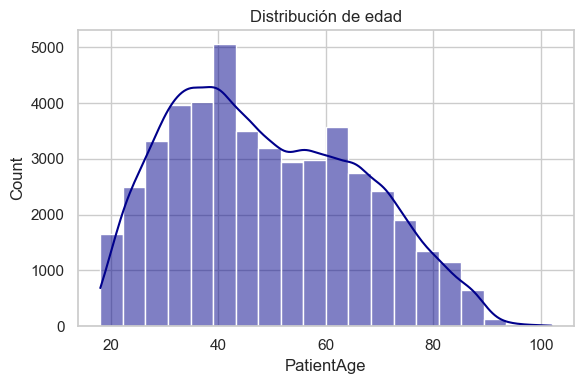

Conteo por rangos de edad y sexo:


PatientSex,F,M,Unknown
PatientAge,,,
"(-0.001, 18.0]",55,117,0
"(18.0, 40.0]",7240,10233,0
"(40.0, 60.0]",6341,9891,6
"(60.0, 80.0]",4978,6283,0
"(80.0, 120.0]",1059,927,0


In [ ]:
if "PatientSex" in df_full.columns:
    print("Distribución de sexo:")
    display(df_full["PatientSex"].value_counts(dropna=False))

if "PatientAge" in df_full.columns:
    print("Estadísticas de edad:")
    display(df_full["PatientAge"].describe())

    plt.figure(figsize=(6,4), facecolor="white")
    sns.histplot(data=df_full, x="PatientAge", bins=20, kde=True, color="darkblue")
    plt.title("Distribución de edad")
    plt.tight_layout()
    plt.show()

    if "PatientSex" in df_full.columns:
        grupos = pd.cut(df_full["PatientAge"], bins=[0,18,40,60,80,120], right=True, include_lowest=True)
        print("Conteo por rangos de edad y sexo:")
        display(pd.crosstab(grupos, df_full["PatientSex"]))

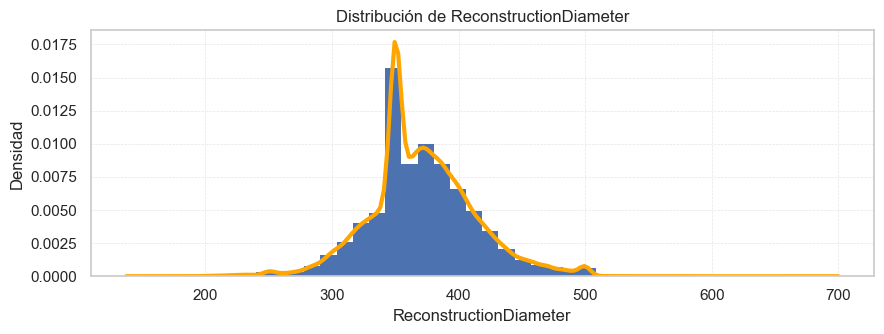

In [98]:
col = "ReconstructionDiameter"
if col in df_full.columns:
    x = df_full[col].dropna().astype(float)

    bins = np.linspace(x.min(), x.max(), 45)

    plt.figure(figsize=(9, 3.5))
    plt.hist(x, bins=bins, density=True, rwidth=1.0, edgecolor="none") 
    if x.nunique() > 1:
        sns.kdeplot(x, color="orange", lw=3, bw_adjust=0.9, clip=(x.min(), x.max()))
    plt.title(f"Distribución de {col}")
    plt.xlabel(col); plt.ylabel("Densidad")
    plt.grid(True, ls="--", lw=0.5, alpha=0.5)
    plt.tight_layout(); plt.show()

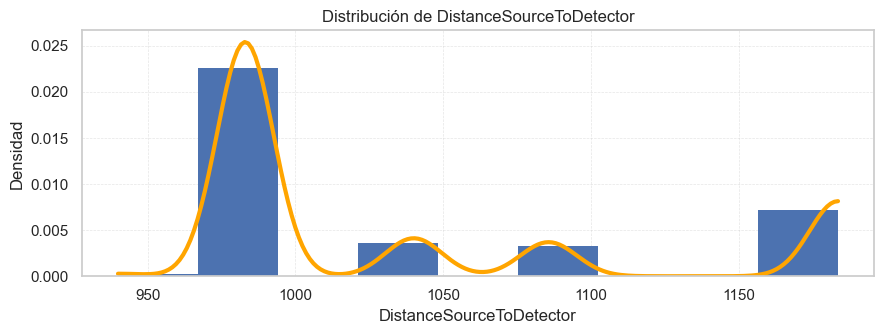

In [92]:
col = "DistanceSourceToDetector"

if col in df_full.columns:
    x = df_full[col].dropna().astype(float)

    bins = np.linspace(x.min(), x.max(), 10)

    plt.figure(figsize=(9, 3.5))
    plt.hist(x, bins=bins, density=True, rwidth=1.0, edgecolor="none")
    if x.nunique() > 1:
        sns.kdeplot(x, color="orange", lw=3, bw_adjust=0.9, clip=(x.min(), x.max()))
    plt.title(f"Distribución de {col}")
    plt.xlabel(col); plt.ylabel("Densidad")
    plt.grid(True, ls="--", lw=0.5, alpha=0.5)
    plt.tight_layout(); plt.show()

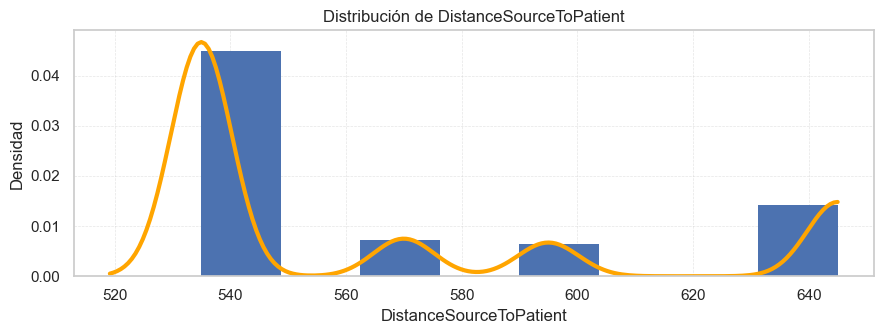

In [88]:
col = "DistanceSourceToPatient"

if col in df_full.columns:
    x = df_full[col].dropna().astype(float)

    bins = np.linspace(x.min(), x.max(), 9)

    plt.figure(figsize=(9, 3.5))
    plt.hist(x, bins=bins, density=True, rwidth=10.0, edgecolor="none")
    if x.nunique() > 1:
        sns.kdeplot(x, color="orange", lw=3, bw_adjust=0.9, clip=(0, x.max()))
    plt.title(f"Distribución de {col}")
    plt.xlabel(col); plt.ylabel("Densidad")
    plt.grid(True, ls="--", lw=0.5, alpha=0.5)
    plt.tight_layout(); plt.show()

In [97]:
print("\nTop fabricantes:")
if "Manufacturer" in df_full.columns:
    display(df_full["Manufacturer"].value_counts().head(3))

print("\nTop modelos:")
if "ManufacturerModelName" in df_full.columns:
    display(df_full["ManufacturerModelName"].value_counts().head(3))

print("\nTop SeriesDescription:")
if "SeriesDescription" in df_full.columns:
    display(df_full["SeriesDescription"].value_counts().head(3))


Top fabricantes:


Manufacturer
Philips                 28966
Siemens Healthineers    13791
PNMS                     2237
Name: count, dtype: int64


Top modelos:


ManufacturerModelName
iCT 256                24543
SOMATOM go.All         13791
Brilliance Big Bore     4421
Name: count, dtype: int64


Top SeriesDescription:


SeriesDescription
HRCT                   13796
Thorax 1,50 Br40 S3     6815
Thorax 1,50 Br60 S3     4074
Name: count, dtype: int64